                               --------- Overview ----------

The dataset summarizes about potential frauds taking in medicare insurance.
The total Medicare spending increased exponentially due to frauds in Medicare claims. Some of the most common types of frauds by providers are:. Duplicate submission of a claim for the same service. Misrepresenting the service provided. Charging for a more complex or expensive service than was actually provided.
We would see a big data use case to see how pyspark can help in our analysis and as well as assists to provide ML computation to predict the fraud cases.

Dataset- (https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis)

In [ ]:
#Installing pyspark
!pip install pyspark

In [1]:
import os
os.environ['PYSPARK_DRIVER_PYTHON'] = "jupyter"
os.environ['PYSPARK_PYTHON'] = "python"


In [2]:
# Import pyspark and host the spark Session
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
#sc = spark.sparkContext
spark = SparkSession(sc)


In [ ]:
'''
# Cleaning our data to preprocess and analyse the same
def read(path):
  file_type = "csv"
  file_location = path
  # CSV options
  infer_schema = "true"
  first_row_is_header = "true"
  delimiter = ","
  df = spark.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", delimiter) \
    .option('nanValue', ' ')\
    .option('nullValue', ' ')\
    .load(file_location)
  df.show() '''

In [ ]:
'''
df_1=read("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Beneficiarydata-1542865627584.csv")
df_2=read("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Inpatientdata-1542865627584.csv")
df_3=read("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Outpatientdata-1542865627584.csv")
df_4=read("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train-1542865627584.csv")'''

In [3]:
# Storing the values of dataframe to the variables for our use
from pyspark.sql.functions import *
import pyspark
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
df_1= spark.read.format("csv").option("header","true").load("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Beneficiarydata-1542865627584.csv")
df_2= spark.read.format("csv").option("header","true").load("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Inpatientdata-1542865627584.csv")
df_3= spark.read.format("csv").option("header","true").load("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train_Outpatientdata-1542865627584.csv")
df_4= spark.read.format("csv").option("header","true").load("C:/Users/yashb/OneDrive/Documents/ALY 6110/archive/Train-1542865627584.csv")

In [ ]:
'''columns_to_drop = ['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']
df_2updated = df_2.drop(*columns_to_drop)
union_data = df_2updated.union(df_3)

#df_2.printSchema()         #AdmissionDt #DischargeDt #DiagnosisGroupCode '''

In [ ]:
#union_data.count()

In [ ]:
'''
test_1=df_1.join(df_3,df_1.BeneID ==  df_3.BeneID,"inner")
test_2=test_1.join(df_4,test_1.Provider == df_4.Provider,"inner")
major_df = test_2.filter(test_2["PotentialFraud"] == 'No')

minor_df = test_2.filter(test_2["PotentialFraud"] == 'Yes')
'''

In [ ]:
#minor_df.count()

Joining our data according to the requirement. The dataset is widely divided into different parts and we intent to use the common attributes and perform the appropriate joins accordingly.

In [4]:
# Applying the join to BeneId ie the policy id.
data_1=df_1.join(df_2,df_1.BeneID ==  df_2.BeneID,"inner")


In [5]:
# Inner join to provider ie the company where insurance is being granted.
data_2=data_1.join(df_4,data_1.Provider == df_4.Provider,"inner")


#major_df = data_2.filter(data_2["PotentialFraud"] == 'No')

#minor_df = data_2.filter(data_2["PotentialFraud"] == 'Yes')
#minor_df.count() 

In [6]:
#major_df.count()

In [7]:
data=data_2.join(df_3,['Provider'])
#major_df = data.filter(data["PotentialFraud"] == 'No')

#minor_df = data.filter(data["PotentialFraud"] == 'Yes')


In [8]:
# Finally we drop the irrelevant coloumns as they dont play a vital role in our analysis.
data=data.drop('DOD','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','DeductibleAmtPaid','ClmAdmitDiagnosisCode','OperatingPhysician','OtherPhysician','AttendingPhysician','OperatingPhysician','OtherPhysician','BeneID')

In [22]:
# The no. of fraud cases status
data.groupBy('PotentialFraud').count().show()

+--------------+-------+
|PotentialFraud|  count|
+--------------+-------+
|            No|1866601|
|           Yes|9140503|
+--------------+-------+



In [10]:
# Stats for Reimbursement amounts
data.select('IPAnnualReimbursementAmt').describe().show()

+-------+------------------------+
|summary|IPAnnualReimbursementAmt|
+-------+------------------------+
|  count|                11007104|
|   mean|      17536.803453478773|
| stddev|      17617.014149701627|
|    min|                       0|
|    max|                    9980|
+-------+------------------------+



 ~ $17500 claims/reimbursements of insurance in average was done by the customers  

In [ ]:
data.show()

In [ ]:
### Alternate way- Converting pyspark to Pandas to assit us in the EDA

In [23]:
# Convert the spark dataset to pandas
df_1=df_1.toPandas()
df_2=df_2.toPandas()
df_3=df_3.toPandas()
df_4=df_4.toPandas()

In [24]:
# Applying the logic for joins.
data_1=df_1.merge(df_2, how='inner', on='BeneID')
data_2=data_1.merge(df_4, how='inner', on='Provider')
data_df=data_2.merge(df_3,how='inner',on='Provider')
data_df=data_df[data_df!='NA']

In [13]:
print(data_df.shape[0])
data_df = data_df.dropna()
print(data_df.shape[0])


11007104
0


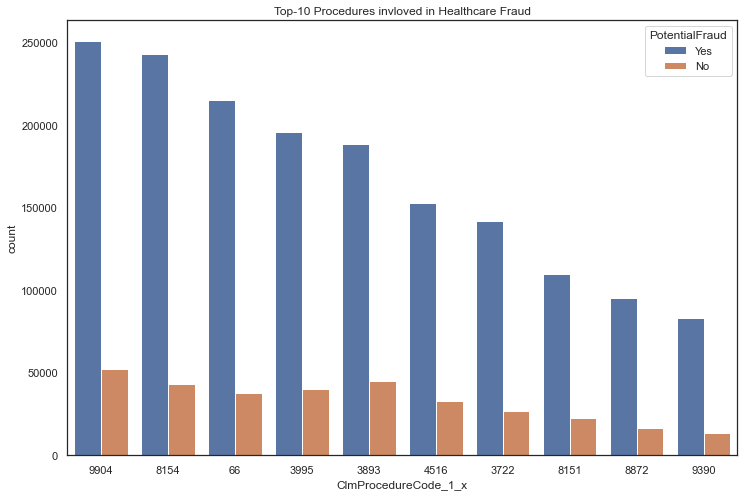

<Figure size 864x576 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='ClmProcedureCode_1_x',hue='PotentialFraud',data=data_df
              ,order=data_df.ClmProcedureCode_1_x.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

We see that procedure 9904 and 8154 had the highest amount of fraud cases.

Text(0.5, 1.0, 'Age Distribution for Fraudelent cases')

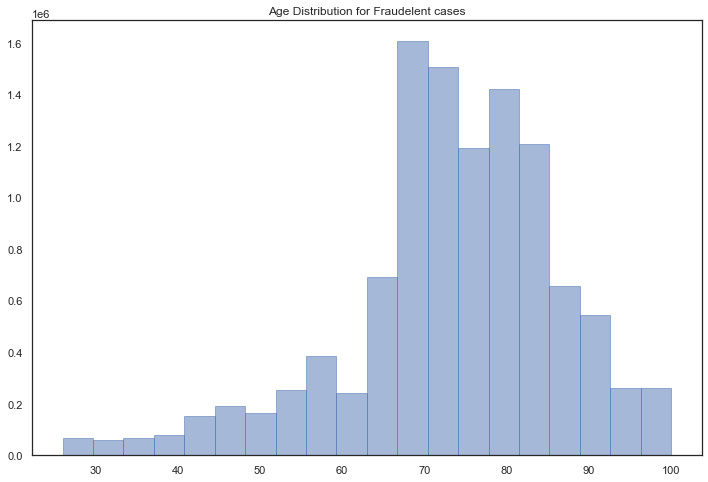

In [26]:
# Distribution for fradulent age range.
import pandas as pd
import matplotlib.pyplot as plt
data_df['DOB'] =  pd.to_datetime(data_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
data_df['DOB'] = data_df['DOB'].where(data_df['DOB'] < now) 
data_df['age'] = (now - data_df['DOB']).astype('<m8[Y]')  

plt.hist(data_df['age'], bins=20, alpha=0.5, edgecolor='b')

#ax = data_df['age'].plt.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='b')
plt.title("Age Distribution for Fraudelent cases")

Most of the fradulent cases observed were for people having an age>65.

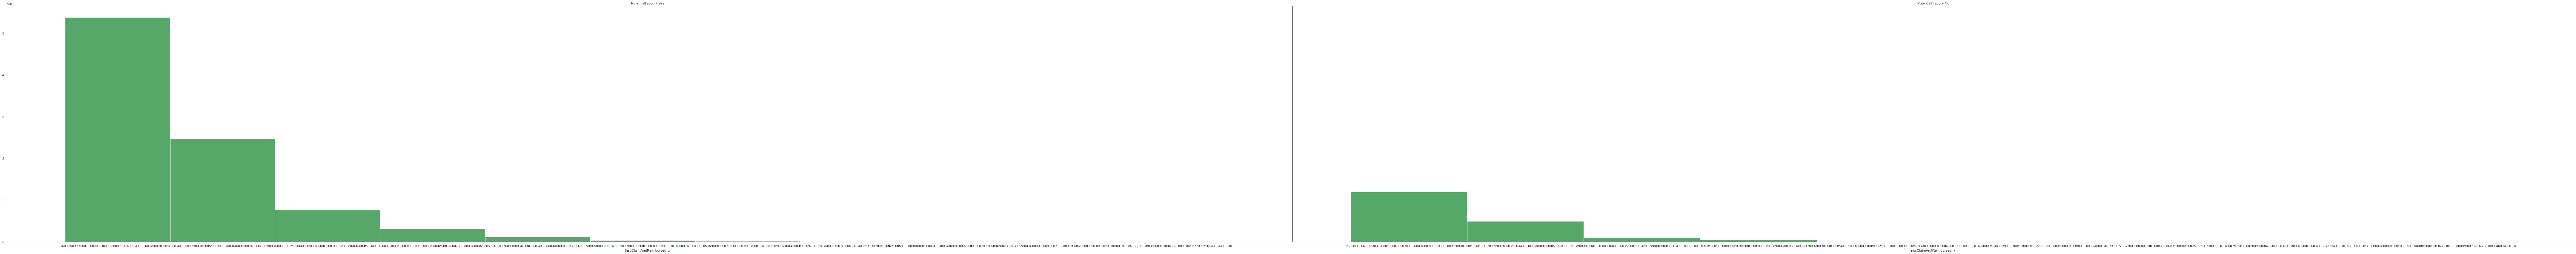

In [27]:
# Were checking the skewness for Claims filed.
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data_df, col='PotentialFraud', height=12, aspect=5)
g.map(plt.hist, 'InscClaimAmtReimbursed_x', bins=10, color = 'g')

The skewness for reimbursements is a right skewed in its distribution.

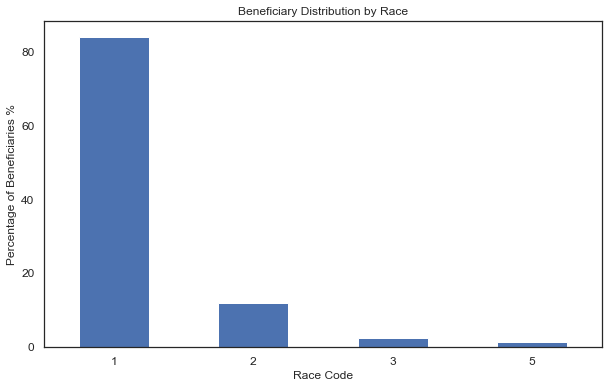

In [28]:
#Plotting the frequencies of race-wise beneficiaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
count_Race = pd.value_counts(data_df['Race'], sort = True)
(count_Race*100/len(data_df)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)
#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))
plt.title("Beneficiary Distribution by Race")
plt.xlabel("Race Code")
plt.ylabel("Percentage of Beneficiaries "'%')
plt.show()

It seems that more than 80% beneficiaries are of same race which is Race 1 which means Maximum population in the dataset originated from same race.There is no race 4 in the dataset

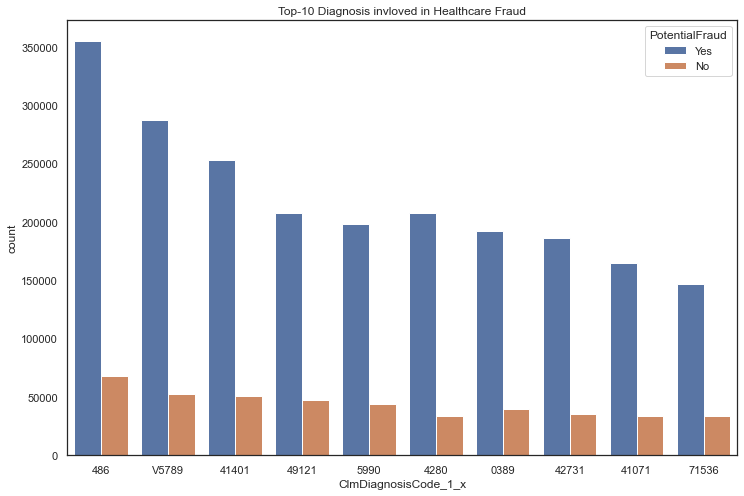

In [29]:
#Top-10 Claim Diagnosis invloved in Healthcare Fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='ClmDiagnosisCode_1_x',hue='PotentialFraud',data=data_df
              ,order=data_df.ClmDiagnosisCode_1_x.value_counts().iloc[:10].index)
plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

In [ ]:
#data=data.limit(10000)

In [ ]:
#data.info()

In [9]:
data=data.drop('Provider','DOB','IPAnnualReimbursementAmt','InscClaimAmtReimbursed','ClaimID','ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DiagnosisGroupCode')

In [ ]:
for col in data.dtypes:
    print(col[0]+" , "+col[1])

    
#data.withColumn(col[0], data.col[0].cast(IntegerType()))

In [11]:
from pyspark.sql.types import IntegerType

In [12]:
data = data.withColumn("Gender", data["Gender"].cast(IntegerType()))
data = data.withColumn("Race", data["Race"].cast(IntegerType()))
data = data.withColumn("RenalDiseaseIndicator", data["RenalDiseaseIndicator"].cast(IntegerType()))
data = data.withColumn("State", data["State"].cast(IntegerType()))
data = data.withColumn("County", data["County"].cast(IntegerType()))
data = data.withColumn("NoOfMonths_PartACov", data["NoOfMonths_PartACov"].cast(IntegerType()))
data = data.withColumn("NoOfMonths_PartBCov", data["NoOfMonths_PartBCov"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Alzheimer", data["ChronicCond_Alzheimer"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Heartfailure", data["ChronicCond_Heartfailure"].cast(IntegerType()))
data = data.withColumn("ChronicCond_KidneyDisease", data["ChronicCond_KidneyDisease"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Cancer", data["ChronicCond_Cancer"].cast(IntegerType()))
data = data.withColumn("ChronicCond_ObstrPulmonary", data["ChronicCond_ObstrPulmonary"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Depression", data["ChronicCond_Depression"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Diabetes", data["ChronicCond_Diabetes"].cast(IntegerType()))
data = data.withColumn("ChronicCond_IschemicHeart", data["ChronicCond_IschemicHeart"].cast(IntegerType()))
data = data.withColumn("ChronicCond_Osteoporasis", data["ChronicCond_Osteoporasis"].cast(IntegerType()))
data = data.withColumn("ChronicCond_rheumatoidarthritis", data["ChronicCond_rheumatoidarthritis"].cast(IntegerType()))
data = data.withColumn("ChronicCond_stroke", data["ChronicCond_stroke"].cast(IntegerType()))
data = data.withColumn("IPAnnualDeductibleAmt", data["IPAnnualDeductibleAmt"].cast(IntegerType()))
data = data.withColumn("OPAnnualReimbursementAmt", data["OPAnnualReimbursementAmt"].cast(IntegerType()))
data = data.withColumn("OPAnnualDeductibleAmt", data["OPAnnualDeductibleAmt"].cast(IntegerType()))



In [13]:
from pyspark.sql import functions as F
data = data.withColumn('PotentialFraud', 
              F.when(data.PotentialFraud == 'No', F.lit(0))
               .when(data.PotentialFraud == 'Yes', F.lit(1)))
              

In [ ]:
for col in data.dtypes:
    print(col[0]+" , "+col[1])

In [ ]:
'''# Convert the required dtypes to int, this process is required to do vector transformation
d['Gender']=  d['Gender'].astype(int)
d['Race'] = d['Race'].astype(int)
d["State"] = d["State"].astype(int)
d['County'] = d["County"].astype(int)
d['NoOfMonths_PartACov'] =d["NoOfMonths_PartACov"].astype(int)
d['NoOfMonths_PartBCov'] = d["NoOfMonths_PartBCov"].astype(int)
d['ChronicCond_Alzheimer'] =d["ChronicCond_Alzheimer"].astype(int)
d["ChronicCond_Heartfailure"] = d["ChronicCond_Heartfailure"].astype(int)
d["ChronicCond_KidneyDisease"] = d["ChronicCond_KidneyDisease"].astype(int)
d['ChronicCond_Cancer'] = d["ChronicCond_Cancer"].astype(int)
d["ChronicCond_ObstrPulmonary"] = d["ChronicCond_ObstrPulmonary"].astype(int)
d['ChronicCond_Depression'] = d["ChronicCond_Depression"].astype(int)
d["ChronicCond_Diabetes"] = d["ChronicCond_Diabetes"].astype(int)
d["ChronicCond_IschemicHeart"] = d["ChronicCond_IschemicHeart"].astype(int)
d["ChronicCond_Osteoporasis"] = d["ChronicCond_Osteoporasis"].astype(int)
d["ChronicCond_rheumatoidarthritis"] = d["ChronicCond_rheumatoidarthritis"].astype(int)
d["ChronicCond_stroke"] = d["ChronicCond_stroke"].astype(int)
d['IPAnnualDeductibleAmt'] = d["IPAnnualDeductibleAmt"].astype(int)
d["OPAnnualReimbursementAmt"] = d["OPAnnualReimbursementAmt"].astype(int)
d["OPAnnualDeductibleAmt"] = d["OPAnnualDeductibleAmt"].astype(int)
d['PotentialFraud']=d['PotentialFraud'].map({'No':0,'Yes':1})
d['PotentialFraud']=d['PotentialFraud'].astype(int)'''

In [ ]:
#d.info()

In [ ]:
# We now would convert our dataframe to spark in order to apply ML Lib.
#sparkDF=spark.createDataFrame(data)

In [ ]:
data.printSchema()

In [ ]:
Balancing Classes

In [14]:
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql.window import Window

n = 500000
seed = 12

fractions = data.groupBy("PotentialFraud").count().withColumn("required_n", n/col("count"))\
                .drop("count").rdd.collectAsMap()

sample_df2 = data.stat.sampleBy("PotentialFraud", fractions, seed)
sample_df2.groupBy("PotentialFraud").count().show()

+--------------+------+
|PotentialFraud| count|
+--------------+------+
|             1|499384|
|             0|500534|
+--------------+------+



In [15]:
# Applying vector assembler to the input features
from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(inputCols=['Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],outputCol="features")
df_temp = vector_assembler.transform(sample_df2)

In [ ]:
Simple Decision tree

In [23]:
# Using a decision tree algorithm to predict the cases for fraud.
from pyspark.ml.classification import DecisionTreeClassifier
(train,test) = df_temp.randomSplit([0.8,0.2],seed=12345)
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'PotentialFraud',impurity='gini',minInfoGain= 0.0)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('PotentialFraud').show(10)

+--------------+
|PotentialFraud|
+--------------+
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
+--------------+
only showing top 10 rows



In [ ]:
predictions.show(5)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="PotentialFraud", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

In [24]:
y_true = predictions.select(['PotentialFraud']).collect()
y_pred = predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54    100266
           1       0.58      0.76      0.66     99939

    accuracy                           0.61    200205
   macro avg       0.62      0.61      0.60    200205
weighted avg       0.62      0.61      0.60    200205



In [ ]:
Random Forest with Hyperparameter Tuning

In [25]:
(train, test) = df_temp.randomSplit([0.8, 0.2])

In [26]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix

In [27]:
rfc = RandomForestClassifier(featuresCol="features", labelCol="PotentialFraud")
rfc = rfc.fit(train)

pred = rfc.transform(test)
#pred.show(3) 

In [28]:
y_true = pred.select(['PotentialFraud']).collect()
y_pred = pred.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59     99782
           1       0.59      0.59      0.59     99911

    accuracy                           0.59    199693
   macro avg       0.59      0.59      0.59    199693
weighted avg       0.59      0.59      0.59    199693



In [17]:
import pandas as pd

Tuning Parameters

In [18]:
# replicate the spark dataframe into multiple copies
replication_df = spark.createDataFrame(pd.DataFrame(list(range(1,10)),columns=['replication_id']))
replicated_train_df = sample_df2.crossJoin(replication_df)

In [19]:
from pyspark.sql.types import StructField
from pyspark.sql.types import StructType
from pyspark.sql.types import DoubleType

In [20]:
# 0. Declare the schema for the output of our function
outSchema = StructType([StructField('replication_id',IntegerType(),True),StructField('Accuracy',DoubleType(),True),StructField('num_trees',IntegerType(),True),StructField('depth',IntegerType(),True),StructField('criterion',StringType(),True)])

# decorate our function with pandas_udf decorator
@F.pandas_udf(outSchema, F.PandasUDFType.GROUPED_MAP)
def run_model(pdf):
    import random
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    # 1. Get randomized hyperparam values
    num_trees =  random.choice(list(range(5,30)))
    depth = random.choice(list(range(2,10)))
    criterion = random.choice(['gini','entropy'])
    replication_id = pdf.replication_id.values[0]
    
    # 2. Train test split
    X = pdf[['Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
    y = pdf['PotentialFraud']
    Xtrain,Xcv,ytrain,ycv = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # 3. Create model using the pandas dataframe
    clf = RandomForestClassifier(n_estimators=num_trees, max_depth = depth, criterion =criterion)
    clf.fit(Xtrain,ytrain)
    
    # 4. Evaluate the model
    accuracy = accuracy_score(clf.predict(Xcv),ycv)
    
    # 5. return results as pandas DF
    res =pd.DataFrame({'replication_id':replication_id,'Accuracy':accuracy, 'num_trees':num_trees,'depth':depth,'criterion':criterion}, index=[0])
    return res

In [ ]:
#pip install pyarrow

C:\Users\yashb\anaconda3\lib\site-packages\pyspark\sql\pandas\group_ops.py:98: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [ ]:
type(results)

+------+----+---------------------+-----+------+-------------------+-------------------+---------------------+------------------------+-------------------------+------------------+--------------------------+----------------------+--------------------+-------------------------+------------------------+-------------------------------+------------------+---------------------+------------------------+---------------------+--------------+--------------+
|Gender|Race|RenalDiseaseIndicator|State|County|NoOfMonths_PartACov|NoOfMonths_PartBCov|ChronicCond_Alzheimer|ChronicCond_Heartfailure|ChronicCond_KidneyDisease|ChronicCond_Cancer|ChronicCond_ObstrPulmonary|ChronicCond_Depression|ChronicCond_Diabetes|ChronicCond_IschemicHeart|ChronicCond_Osteoporasis|ChronicCond_rheumatoidarthritis|ChronicCond_stroke|IPAnnualDeductibleAmt|OPAnnualReimbursementAmt|OPAnnualDeductibleAmt|PotentialFraud|replication_id|
+------+----+---------------------+-----+------+-------------------+-------------------+------

In [22]:
results.sort(F.desc("Accuracy")).show()

+--------------+------------------+---------+-----+---------+
|replication_id|          Accuracy|num_trees|depth|criterion|
+--------------+------------------+---------+-----+---------+
|             8|0.7247494030520102|       14|    9|     gini|
|             4|0.7156073112492879|       26|    9|  entropy|
|             7|0.7018653867132104|       13|    9|     gini|
|             1|0.6403524720313201|       13|    7|     gini|
|             5|0.6194077791110626|       15|    6|     gini|
|             2|0.6034538138007103|       11|    6|     gini|
|             6|0.5975509981455219|       17|    5|     gini|
|             3|0.5965207325794214|       16|    5|  entropy|
|             9| 0.564570379258936|       10|    2|  entropy|
+--------------+------------------+---------+-----+---------+



In [ ]:
#major_df = data.filter(data["PotentialFraud"] == 0)
#major_df.count()

In [ ]:
#minor_df = data.filter(data["PotentialFraud"] == 1)
#minor_df.count()